# Image classificaiton with SVM algorithms

In [1]:
import pandas as pd
import numpy as np
import os
%matplotlib inline 
import matplotlib.pyplot as plt


#load data

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


batch1=unpickle("data/data_batch_1")
batch2=unpickle("data/data_batch_2")
batch3=unpickle("data/data_batch_3")
batch4=unpickle("data/data_batch_4")
batch5=unpickle("data/data_batch_5")
test_batch=unpickle("data/test_batch")

print(batch1)


{b'batch_label': b'training batch 1 of 5', b'labels': [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 

Loaded in this way, each of the batch files contains a dictionary with the following elements:

data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.

labels -- a list of 10000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.

In [2]:
print(batch1[b'data'][1].size)
print(len(batch1[b'labels']))




3072
10000


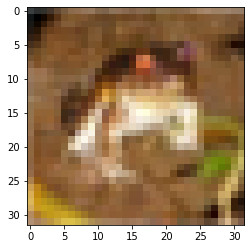

In [3]:
from skimage.transform import resize

images=[]
flat_images=[]
labels=[]

for i in range(0,10000):
    image=batch1[b'data'][i, :]
    img_r=image[0:1024].reshape(32,32)
    img_g=image[1024:2048].reshape(32,32)
    img_b=image[2048:].reshape(32,32)
    img = np.dstack((img_r, img_g, img_b))
    images.append(img)
    flat_images.append(img.flatten())


#flat_data=np.array(flat_data)
plt.imshow(images[0],interpolation='nearest')


In [4]:
x_train=flat_images
print(x_train)

labels=np.array(batch1[b'labels'])
y_train=labels
print(y_train)

[array([ 59,  62,  63, ..., 123,  92,  72], dtype=uint8), array([154, 177, 187, ..., 143, 133, 144], dtype=uint8), array([255, 255, 255, ...,  80,  86,  84], dtype=uint8), array([28, 25, 10, ..., 72, 65, 46], dtype=uint8), array([170, 180, 198, ...,  73,  77,  80], dtype=uint8), array([159, 102, 101, ..., 182,  57,  19], dtype=uint8), array([164, 206,  84, ..., 122, 170,  44], dtype=uint8), array([ 28,  35,  39, ..., 101, 140,  96], dtype=uint8), array([134, 186, 223, ...,  32,  94, 138], dtype=uint8), array([125, 125, 116, ..., 144, 116,  86], dtype=uint8), array([53, 65, 53, ..., 49, 50, 41], dtype=uint8), array([142, 149, 152, ..., 163, 125, 111], dtype=uint8), array([164, 215, 244, ..., 120, 154, 100], dtype=uint8), array([17,  3,  2, ..., 32, 23, 16], dtype=uint8), array([100, 146, 192, ..., 156, 150, 137], dtype=uint8), array([100, 168, 231, ..., 162, 185, 202], dtype=uint8), array([235, 236, 238, ...,  51,  68,  14], dtype=uint8), array([110, 104,  97, ...,  51,  48,  62], dtype

In [5]:
test_images=[]
flat_test_images=[]
for i in range(0,10000):
    image=test_batch[b'data'][i, :]
    img_r=image[0:1024].reshape(32,32)
    img_g=image[1024:2048].reshape(32,32)
    img_b=image[2048:].reshape(32,32)
    img = np.dstack((img_r, img_g, img_b))
    test_images.append(img)
    flat_test_images.append(img.flatten())

test_labels=np.array(test_batch[b'labels'])

x_test=flat_test_images
print(x_test)

labels=np.array(test_batch[b'labels'])
y_test=test_labels
print(y_test)

[array([158, 112,  49, ...,  21,  67, 110], dtype=uint8), array([235, 235, 235, ..., 186, 200, 199], dtype=uint8), array([158, 190, 222, ...,   7,   8,   7], dtype=uint8), array([155, 156, 149, ...,  73,  68,  50], dtype=uint8), array([ 65,  68,  50, ..., 128, 156, 117], dtype=uint8), array([179, 118,  83, ..., 152,  87,  73], dtype=uint8), array([160,  37,  13, ...,  29,  30,  28], dtype=uint8), array([83, 94, 85, ..., 72, 38, 22], dtype=uint8), array([ 23,  19,  23, ..., 150, 132, 118], dtype=uint8), array([217, 215, 209, ..., 186, 185, 223], dtype=uint8), array([ 90, 124, 149, ...,  89, 120, 146], dtype=uint8), array([255, 255, 251, ..., 203, 176, 157], dtype=uint8), array([91, 64, 30, ..., 28, 31, 50], dtype=uint8), array([35, 36, 31, ...,  7,  4,  4], dtype=uint8), array([200, 169,  75, ..., 132, 121,  94], dtype=uint8), array([203, 223, 217, ...,   2,  35,  24], dtype=uint8), array([95, 76, 78, ..., 22, 11, 28], dtype=uint8), array([ 60, 128, 147, ..., 212, 210, 196], dtype=uint8

In [6]:
from sklearn import svm, metrics
from sklearn.model_selection import GridSearchCV

svc=svm.SVC(gamma=0.001, kernel='linear') 
svc.fit(x_train,y_train)
pred = svc.predict(x_test)
#metrics.classification_report(y_test, pred)
accuracy_score(y_test,pred)

KeyboardInterrupt: 